## Part I: Preprocessing and EDA

In [1]:
import pandas as pd

orders = pd.read_csv('./data/Orders.csv')

In [2]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [3]:
returns = pd.read_csv('./data/Returns.csv')
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


## Problem 1: Dataset Import & Cleaning

In [4]:
# Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type.

In [5]:
orders['Sales']

0          $221.98
1        $3,709.40
2        $5,175.17
3        $2,892.51
4        $2,832.96
           ...    
51285       $65.10
51286       $16.72
51287        $8.56
51288       $13.44
51289       $61.38
Name: Sales, Length: 51290, dtype: object

In [6]:
orders['Sales'] = orders['Sales'].str.replace("$",'')
orders['Sales'] = orders['Sales'].str.replace(",", "")
orders['Sales'] = orders['Sales'].astype(float)



In [7]:
orders['Sales'][:10]

0     221.98
1    3709.40
2    5175.17
3    2892.51
4    2832.96
5    2862.68
6    1822.08
7    5244.84
8     341.96
9      48.71
Name: Sales, dtype: float64

In [8]:
orders['Profit']

0          $62.15
1        -$288.77
2         $919.97
3         -$96.54
4         $311.52
           ...   
51285       $4.50
51286       $3.34
51287       $2.48
51288       $2.40
51289       $1.80
Name: Profit, Length: 51290, dtype: object

In [9]:
orders['Profit'] = orders['Profit'].str.replace("$", "")
orders['Profit'] = orders['Profit'].str.replace(",", "")
orders['Profit'] = orders['Profit'].astype(float)

orders['Profit'][:10]

0     62.15
1   -288.77
2    919.97
3    -96.54
4    311.52
5    763.28
6    564.84
7    996.48
8     54.71
9      5.48
Name: Profit, dtype: float64

In [10]:
orders

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,6/19/15,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,OFF-FA-3072,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium
51286,34337,US-2014-ZD21925140-41765,5/6/14,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,FUR-FU-4070,Furniture,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High
51287,31315,CA-2012-ZD21925140-41147,8/26/12,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,OFF-AR-5321,Office Supplies,Art,Newell 341,8.56,2,0.0,2.48,1.580,High
51288,9596,MX-2013-RB1979518-41322,2/17/13,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,OFF-BI-2919,Office Supplies,Binders,"Acco Index Tab, Economy",13.44,2,0.0,2.40,1.003,Medium


### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

In [11]:
# creating season columm

In [12]:
orders.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority'],
      dtype='object')

In [13]:
orders['Order.Date']

0        11/11/14
1          2/5/14
2        10/17/14
3         1/28/14
4         11/5/14
           ...   
51285     6/19/15
51286      5/6/14
51287     8/26/12
51288     2/17/13
51289     5/22/13
Name: Order.Date, Length: 51290, dtype: object

In [14]:
from datetime import datetime

order_date = datetime.strptime('11/11/14', "%m/%d/%y")
order_date

datetime.datetime(2014, 11, 11, 0, 0)

In [15]:
orders['Order.Date']= [datetime.strptime(order_date, "%m/%d/%y") for order_date in orders['Order.Date']]

In [16]:
orders['Order.Date']

0       2014-11-11
1       2014-02-05
2       2014-10-17
3       2014-01-28
4       2014-11-05
           ...    
51285   2015-06-19
51286   2014-05-06
51287   2012-08-26
51288   2013-02-17
51289   2013-05-22
Name: Order.Date, Length: 51290, dtype: datetime64[ns]

In [17]:
orders['Order.Date'].dt.month

0        11
1         2
2        10
3         1
4        11
         ..
51285     6
51286     5
51287     8
51288     2
51289     5
Name: Order.Date, Length: 51290, dtype: int64

In [18]:
season_dict = {0:"Winter",
               1:"Spring",
               2:"Summer",
               3:"Autumn",
               4:"Winter"}
month_series = orders['Order.Date'].dt.month
# [season_dict[(month // 3)] 

In [19]:
 [season_dict[(month // 3)] for month in month_series]

['Autumn',
 'Winter',
 'Autumn',
 'Winter',
 'Autumn',
 'Summer',
 'Autumn',
 'Spring',
 'Autumn',
 'Spring',
 'Spring',
 'Spring',
 'Winter',
 'Autumn',
 'Summer',
 'Summer',
 'Winter',
 'Autumn',
 'Winter',
 'Winter',
 'Summer',
 'Spring',
 'Spring',
 'Winter',
 'Summer',
 'Autumn',
 'Winter',
 'Spring',
 'Spring',
 'Winter',
 'Winter',
 'Summer',
 'Winter',
 'Autumn',
 'Winter',
 'Autumn',
 'Spring',
 'Winter',
 'Winter',
 'Winter',
 'Summer',
 'Autumn',
 'Autumn',
 'Winter',
 'Autumn',
 'Spring',
 'Spring',
 'Summer',
 'Spring',
 'Winter',
 'Autumn',
 'Autumn',
 'Winter',
 'Winter',
 'Winter',
 'Spring',
 'Spring',
 'Spring',
 'Summer',
 'Spring',
 'Spring',
 'Winter',
 'Summer',
 'Summer',
 'Winter',
 'Winter',
 'Winter',
 'Winter',
 'Autumn',
 'Autumn',
 'Summer',
 'Autumn',
 'Spring',
 'Summer',
 'Autumn',
 'Spring',
 'Summer',
 'Autumn',
 'Autumn',
 'Autumn',
 'Autumn',
 'Autumn',
 'Autumn',
 'Autumn',
 'Winter',
 'Autumn',
 'Autumn',
 'Summer',
 'Autumn',
 'Winter',
 'Spring',

In [20]:
orders['Order.Year'] = orders['Order.Date'].dt.year

In [21]:
orders['Season'] = [season_dict[(month // 3)%4] for month in month_series]
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Year,Season
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2014,Autumn
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2014,Winter
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,2014,Autumn
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,2014,Winter
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,2014,Autumn


In [22]:
# seasonal inventory trend

In [23]:
quantity_by_season = orders[['Quantity', 'Season']].groupby('Season').sum()
quantity_by_season 

,Quantity
Season,
Autumn,59161
Spring,34052
Summer,46651
Winter,38448


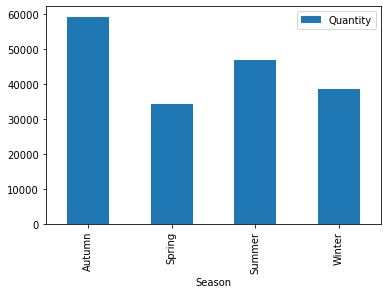

In [24]:
quantity_by_season.plot.bar()

In [25]:
# seasonal trend by category
quantity_by_season_by_category = orders[['Category', 'Quantity', 'Season']].groupby(['Category', 'Season']).sum()

quantity_by_season_by_category

Quantity
Category        Season          
Furniture       Autumn     11905
                Spring      6587
                Summer      8650
                Winter      7750
Office Supplies Autumn     35686
                Spring     20844
                Summer     28649
                Winter     23065
Technology      Autumn     11570
                Spring      6621
                Summer      9352
                Winter      7633

In [26]:
orders['Category'].unique()

array(['Technology', 'Furniture', 'Office Supplies'], dtype=object)

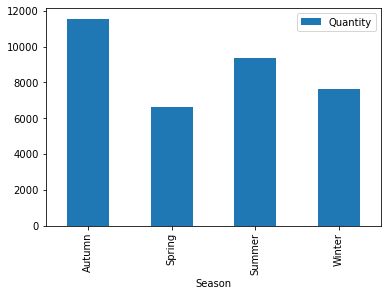

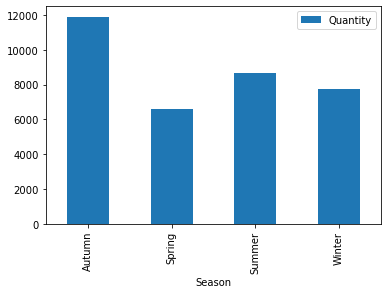

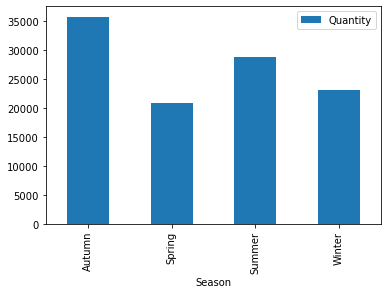

In [27]:
for column in ['Technology', 'Furniture', 'Office Supplies']:
    quantity_by_season_by_category.loc[column,:].plot.bar()

### Problem 3: Why did customers make returns?

In [28]:
# How much profit did we lose due to returns each year?

In [29]:
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [30]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Year,Season
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2014,Autumn
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2014,Winter
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,2014,Autumn
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,2014,Winter
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,2014,Autumn


In [31]:
# join orders, returns
return_id = set(returns['Order ID'])
orders["Returned"] = [index in return_id for index in orders['Order.ID']]

In [32]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Year,Season,Returned
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2014,Autumn,False
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2014,Winter,False
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,2014,Autumn,False
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,2014,Winter,False
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,2014,Autumn,False


In [33]:
# How much profit did we lose due to returns each year?

In [34]:
orders[orders['Returned']]

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Year,Season,Returned
26,30191,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,"Lesro Conference Table, with Bottom Storage",1715.16,2,0.0,720.36,725.570,Critical,2012,Winter,True
53,30190,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,"Safco Classic Bookcase, Pine",2197.50,5,0.0,153.75,627.270,Critical,2012,Winter,True
75,25438,IN-2015-JH158207-42140,2015-05-16,5/18/15,Second Class,JH-158207,John Huston,Consumer,NaN,Melbourne,...,"Apple Smart Phone, Cordless",2863.35,5,0.1,858.90,581.880,Critical,2015,Spring,True
110,32648,CA-2014-AS10045140-41727,2014-03-29,4/1/14,First Class,AS-100451408,Aaron Smayling,Corporate,22204.0,Arlington,...,Hanging Personal Folder File,31.40,2,0.0,7.85,3.810,Medium,2014,Spring,True
113,29629,IN-2014-LC168857-41747,2014-04-18,4/19/14,First Class,LC-168857,Lena Creighton,Consumer,NaN,Sydney,...,"Sharp Wireless Fax, Laser",1601.64,5,0.1,587.19,511.470,Critical,2014,Spring,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51165,1359,MX-2012-ME1732018-41164,2012-09-12,9/15/12,Second Class,ME-1732018,Maria Etezadi,Home Office,NaN,Bagé,...,"Fellowes Box, Wire Frame",12.50,1,0.0,5.36,1.064,Medium,2012,Autumn,True
51183,23767,IN-2013-CC1261027-41286,2013-01-12,1/16/13,Standard Class,CC-1261027,Corey Catlett,Corporate,NaN,Nantong,...,"Novimex Legal Exhibit Labels, 5000 Label Set",10.86,1,0.0,5.43,1.060,High,2013,Winter,True
51224,36974,CA-2012-ZC21910140-41271,2012-12-28,1/4/13,Standard Class,ZC-219101402,Zuschuss Carroll,Consumer,60610.0,Chicago,...,Tenex Chairmats For Use with Hard Floors,38.98,3,0.6,-50.67,5.290,Low,2012,Winter,True
51247,41315,EG-2014-PM894038-41846,2014-07-26,7/30/14,Standard Class,PM-894038,Paul MacIntyre,Consumer,NaN,Alexandria,...,"Sanford Pencil Sharpener, Fluorescent",25.83,1,0.0,9.03,1.050,Medium,2014,Summer,True


In [35]:
returned_orders = orders[orders['Returned']][['Product.ID', 'Returned']]
returned_orders.head()

,Product.ID,Returned
26,FUR-TA-5060,True
53,FUR-BO-5762,True
75,TEC-PH-3147,True
110,OFF-ST-4516,True
113,TEC-CO-6012,True


In [36]:
product_returned = returned_orders.groupby(['Product.ID']).count()

product_returned

,Returned
Product.ID,
FUR-BO-3176,1
FUR-BO-3615,1
FUR-BO-3616,1
FUR-BO-3621,1
FUR-BO-3624,2
...,...
TEC-PH-6348,1
TEC-PH-6364,1
TEC-PH-6365,1


In [37]:
product_returned.loc["TEC-PH-6425"][0]

1

In [39]:
product_dict = {}
for product_id, returned_n in zip(product_returned.index, product_returned['Returned']):
    product_dict[product_id]=returned_n
    
product_dict

{'FUR-BO-3176': 1,
 'FUR-BO-3615': 1,
 'FUR-BO-3616': 1,
 'FUR-BO-3621': 1,
 'FUR-BO-3624': 2,
 'FUR-BO-3625': 2,
 'FUR-BO-3627': 1,
 'FUR-BO-3628': 1,
 'FUR-BO-3629': 2,
 'FUR-BO-3630': 1,
 'FUR-BO-3636': 1,
 'FUR-BO-3637': 2,
 'FUR-BO-3640': 2,
 'FUR-BO-3644': 1,
 'FUR-BO-3645': 1,
 'FUR-BO-3647': 3,
 'FUR-BO-3648': 1,
 'FUR-BO-3652': 2,
 'FUR-BO-3885': 2,
 'FUR-BO-3886': 1,
 'FUR-BO-3887': 2,
 'FUR-BO-3889': 2,
 'FUR-BO-3893': 1,
 'FUR-BO-3895': 2,
 'FUR-BO-3901': 1,
 'FUR-BO-3902': 1,
 'FUR-BO-3903': 3,
 'FUR-BO-3904': 2,
 'FUR-BO-3906': 2,
 'FUR-BO-3907': 1,
 'FUR-BO-3978': 1,
 'FUR-BO-4668': 1,
 'FUR-BO-4848': 2,
 'FUR-BO-4850': 1,
 'FUR-BO-4852': 1,
 'FUR-BO-4854': 1,
 'FUR-BO-4860': 1,
 'FUR-BO-4861': 1,
 'FUR-BO-4864': 1,
 'FUR-BO-4865': 2,
 'FUR-BO-4866': 2,
 'FUR-BO-5522': 1,
 'FUR-BO-5527': 1,
 'FUR-BO-5529': 1,
 'FUR-BO-5745': 2,
 'FUR-BO-5748': 1,
 'FUR-BO-5760': 1,
 'FUR-BO-5762': 2,
 'FUR-BO-5763': 1,
 'FUR-BO-5768': 1,
 'FUR-BO-5769': 1,
 'FUR-BO-5770': 1,
 'FUR-BO-577

In [40]:
result = []
for product_id in orders['Product.ID']:
    if product_id in product_dict:
        value = product_dict[product_id]
    else:
        value = 0
    result.append(value)
result

[0,
 2,
 2,
 0,
 0,
 1,
 5,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 12,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 2,
 2,
 0,
 0,
 1,
 0,
 2,
 0,
 1,
 0,
 2,
 0,
 2,
 1,
 0,
 2,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 2,
 0,
 1,
 1,
 3,
 3,
 0,
 0,
 2,
 0,
 1,
 0,
 2,
 12,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 2,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 3,
 0,
 2,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 0,
 0,
 5,
 1,
 3,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0

In [41]:
orders['Returned.N'] = result

In [42]:
orders

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Year,Season,Returned,Returned.N
0,40098,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,221.98,2,0.0,62.15,40.770,High,2014,Autumn,False,0
1,26341,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,3709.40,9,0.1,-288.77,923.630,Critical,2014,Winter,False,2
2,25330,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,5175.17,9,0.1,919.97,915.490,Medium,2014,Autumn,False,2
3,13524,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,2892.51,5,0.1,-96.54,910.160,Medium,2014,Winter,False,0
4,47221,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,2832.96,8,0.0,311.52,903.040,Critical,2014,Autumn,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,65.10,5,0.0,4.50,1.010,Medium,2015,Summer,False,1
51286,34337,US-2014-ZD21925140-41765,2014-05-06,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,16.72,5,0.2,3.34,1.930,High,2014,Spring,False,0
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,8.56,2,0.0,2.48,1.580,High,2012,Summer,False,0
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2/21/13,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,13.44,2,0.0,2.40,1.003,Medium,2013,Winter,False,2


In [43]:
returned_orders = orders[orders['Returned']]
returned_orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Year,Season,Returned,Returned.N
26,30191,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,1715.16,2,0.0,720.36,725.57,Critical,2012,Winter,True,1
53,30190,IN-2012-PB19210127-41259,2012-12-16,12/19/12,First Class,PB-19210127,Phillip Breyer,Corporate,NaN,Taipei,...,2197.50,5,0.0,153.75,627.27,Critical,2012,Winter,True,2
75,25438,IN-2015-JH158207-42140,2015-05-16,5/18/15,Second Class,JH-158207,John Huston,Consumer,NaN,Melbourne,...,2863.35,5,0.1,858.90,581.88,Critical,2015,Spring,True,2
110,32648,CA-2014-AS10045140-41727,2014-03-29,4/1/14,First Class,AS-100451408,Aaron Smayling,Corporate,22204.0,Arlington,...,31.40,2,0.0,7.85,3.81,Medium,2014,Spring,True,2
113,29629,IN-2014-LC168857-41747,2014-04-18,4/19/14,First Class,LC-168857,Lena Creighton,Consumer,NaN,Sydney,...,1601.64,5,0.1,587.19,511.47,Critical,2014,Spring,True,1


In [44]:
returned_orders[['Profit', 'Order.Year']].head()

,Profit,Order.Year
26,720.36,2012
53,153.75,2012
75,858.90,2015
110,7.85,2014
113,587.19,2014


In [49]:
# profit by year in the reutrned item..
profit_by_year = returned_orders[['Profit', 'Order.Year']].groupby(['Order.Year']).sum()
profit_by_year 

,Profit
Order.Year,
2012,17477.26
2013,9269.89
2014,17510.63
2015,17112.97


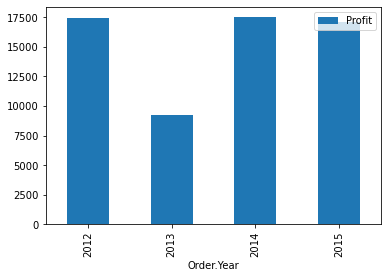

In [50]:
profit_by_year.plot.bar()

In [ ]:
# How many customer returned more than once? more than 5 times

In [52]:
returned_orders["Customer.ID"]

26        PB-19210127
53        PB-19210127
75          JH-158207
110      AS-100451408
113         LC-168857
             ...     
51165      ME-1732018
51183      CC-1261027
51224    ZC-219101402
51247       PM-894038
51256      JE-1561097
Name: Customer.ID, Length: 2220, dtype: object

In [58]:
returend_customers = returned_orders[['Customer.ID','Returned']].groupby(['Customer.ID']).count()
returend_customers

,Returned
Customer.ID,
AA-1031558,1
AA-106451404,1
AA-1064559,3
AA-1064564,1
AA-645137,1
...,...
WB-218501406,3
WB-2185064,1
YS-2188093,1


In [62]:
returned_customers_morethan_1 = returned_customers[returned_customers['Returned'] >= 1]

returned_customers_morethan_1.head()

,Returned
Customer.ID,
AA-1031558,1
AA-106451404,1
AA-1064559,3
AA-1064564,1
AA-645137,1


In [63]:
len(returned_customers_morethan_1)

1061

In [60]:
returned_customers_morethan_5 = returned_customers[returned_customers['Returned'] >= 5]

returned_customers_morethan_5.head()

,Returned
Customer.ID,
AB-1016545,6
AB-60086,6
AC-66038,5
AG-1049545,5
AG-675117,6


In [61]:
len(returned_customers_morethan_5)

80

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DBE0DC0AF0>]],
      dtype=object)

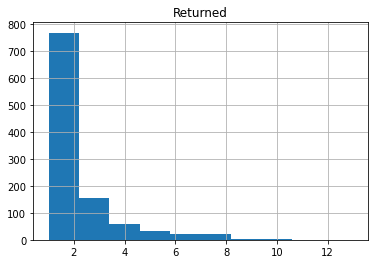

In [64]:
returned_customers.hist()

In [65]:
 # Which regions are more likely to return orders?

In [67]:
orders['Region']

0             Central US
1                Oceania
2                Oceania
3         Western Europe
4         Western Africa
              ...       
51285       Eastern Asia
51286        Southern US
51287         Western US
51288      South America
51289    Central America
Name: Region, Length: 51290, dtype: object

In [68]:
returned_by_region = returned_orders[['Region','Returned']].groupby(['Region']).count()
returned_by_region.head()

,Returned
Region,
Canada,15
Caribbean,69
Central Africa,17
Central America,248
Central Asia,9


In [69]:
orders_by_region = orders[['Region','Order.Year']].groupby(['Region']).count()
orders_by_region.head()

,Order.Year
Region,
Canada,384
Caribbean,1690
Central Africa,643
Central America,5616
Central Asia,217


In [70]:
return_ratio_by_region = returned_by_region['Returned'] / orders_by_region['Order.Year']
return_ratio_by_region.head()

Region
Canada             0.039062
Caribbean          0.040828
Central Africa     0.026439
Central America    0.044160
Central Asia       0.041475
dtype: float64

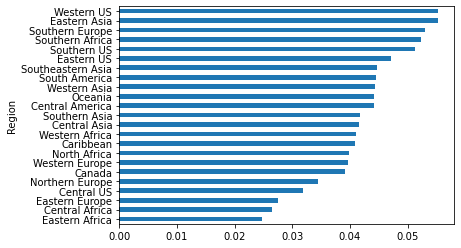

In [71]:
return_ratio_by_region.sort_values().plot.barh()

In [ ]:
# Which categories (sub-categories) of products are more likely to be returned?

In [72]:
orders_by_category = orders[['Sub.Category', 'Order.Year']].groupby(['Sub.Category']).count()
orders_by_category

,Order.Year
Sub.Category,
Accessories,3075
Appliances,1742
Art,4864
Binders,6146
Bookcases,2411
Chairs,3434
Copiers,2223
Envelopes,2387
Fasteners,2601


In [73]:
returned_by_category = returned_orders[['Sub.Category', 'Returned']].groupby(['Sub.Category']).count()
returned_by_category

,Returned
Sub.Category,
Accessories,138
Appliances,59
Art,217
Binders,269
Bookcases,104
Chairs,147
Copiers,99
Envelopes,99
Fasteners,102


In [74]:
returned_ratio_by_category = returned_by_category['Returned'] / orders_by_category['Order.Year']
returned_ratio_by_category

Sub.Category
Accessories    0.044878
Appliances     0.033869
Art            0.044613
Binders        0.043768
Bookcases      0.043136
Chairs         0.042807
Copiers        0.044534
Envelopes      0.041475
Fasteners      0.039216
Furnishings    0.042803
Labels         0.052672
Machines       0.042396
Paper          0.042955
Phones         0.043193
Storage        0.041989
Supplies       0.042792
Tables         0.047619
dtype: float64

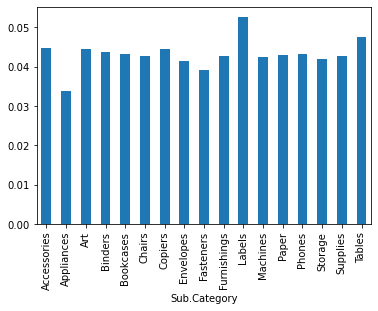

In [75]:
returned_ratio_by_category.plot.bar()


## Part II: Machine Learning and Business Use Case

Now your manager has a basic understanding of why customers returned orders. Next, he wants you to use machine learning to predict which orders are most likely to be returned. In this part, you will generate several features based on our previous findings and your manager's requirements.

In [ ]:
### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders’ IDs are contained in the dataset “returns”

In [ ]:

#### Step 2:
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.
- ***Hint:*** Process.Time = Ship.Date - Order.Date

In [79]:
# count processing time

ship_date = datetime.strptime('11/13/14', "%m/%d/%y")

ship_date

datetime.datetime(2014, 11, 13, 0, 0)

In [80]:
orders['Ship.Date'] = [datetime.strptime(ship_date, "%m/%d/%y") for ship_date in orders['Ship.Date']]

In [85]:
orders['Process.Time'] = [(ship_date - order_date).days for order_date, ship_date in zip(orders['Order.Date'], orders['Ship.Date'])]  

orders['Process.Time'].head()

0    2
1    2
2    1
3    2
4    1
Name: Process.Time, dtype: int64

In [86]:
orders

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Year,Season,Returned,Returned.N,Process.Time
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,2,0.0,62.15,40.770,High,2014,Autumn,False,0,2
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,9,0.1,-288.77,923.630,Critical,2014,Winter,False,2,2
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,9,0.1,919.97,915.490,Medium,2014,Autumn,False,2,1
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,5,0.1,-96.54,910.160,Medium,2014,Winter,False,0,2
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,8,0.0,311.52,903.040,Critical,2014,Autumn,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2015-KE1642066-42174,2015-06-19,2015-06-19,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,...,5,0.0,4.50,1.010,Medium,2015,Summer,False,1,0
51286,34337,US-2014-ZD21925140-41765,2014-05-06,2014-05-10,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,...,5,0.2,3.34,1.930,High,2014,Spring,False,0,4
51287,31315,CA-2012-ZD21925140-41147,2012-08-26,2012-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,...,2,0.0,2.48,1.580,High,2012,Summer,False,0,5
51288,9596,MX-2013-RB1979518-41322,2013-02-17,2013-02-21,Standard Class,RB-1979518,Ross Baird,Home Office,NaN,Valinhos,...,2,0.0,2.40,1.003,Medium,2013,Winter,False,2,4


In [87]:
orders[['Customer.ID','Returned']].groupby(['Customer.ID']).count()

,Returned
Customer.ID,
AA-10315102,6
AA-10315120,1
AA-10315139,13
AA-103151402,6
AA-103151404,3
...,...
ZD-2192548,4
ZD-2192564,4
ZD-219257,1


In [88]:
features = ['Quantity', 'Discount', 'Shipping.Cost', 'Process.Time', 'Returned.N']

X = orders[features]
y = orders['Returned']

X.head()

,Quantity,Discount,Shipping.Cost,Process.Time,Returned.N
0,2,0.0,40.77,2,0
1,9,0.1,923.63,2,2
2,9,0.1,915.49,1,2
3,5,0.1,910.16,2,0
4,8,0.0,903.04,1,0


In [89]:
(orders['Returned.N'] / orders['Quantity'])[::1000]

0        0.000000
1000     0.250000
2000     0.000000
3000     0.000000
4000     0.000000
5000     0.000000
6000     0.000000
7000     0.000000
8000     0.250000
9000     0.333333
10000    0.500000
11000    0.750000
12000    0.250000
13000    0.333333
14000    0.142857
15000    1.000000
16000    0.000000
17000    0.285714
18000    0.000000
19000    0.000000
20000    0.666667
21000    1.000000
22000    0.333333
23000    0.500000
24000    0.333333
25000    0.000000
26000    0.000000
27000    0.000000
28000    0.200000
29000    0.000000
30000    0.000000
31000    0.400000
32000    2.000000
33000    2.000000
34000    0.333333
35000    0.000000
36000    0.600000
37000    0.000000
38000    0.000000
39000    0.000000
40000    3.000000
41000    0.000000
42000    0.000000
43000    0.000000
44000    2.000000
45000    0.500000
46000    0.500000
47000    0.333333
48000    3.000000
49000    0.000000
50000    0.333333
51000    0.333333
dtype: float64

In [90]:
y

0        False
1        False
2        False
3        False
4        False
         ...  
51285    False
51286    False
51287    False
51288    False
51289    False
Name: Returned, Length: 51290, dtype: bool

In [91]:
sum(y == pd.Series([False for i in range(len(orders['Returned']))])) / len(y)

0.956716708910119

In [95]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X, y)
clf.score(X, y)

0.9565607330863716

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9592513160460129

In [97]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=4)
skf.get_n_splits(X, y)

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index,:], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]
    clf = LogisticRegression(random_state=0).fit(X_train, y_train)
    print(clf.score(X_test, y_test))

0.9566404117601185
0.9567183966310536
0.9566370301045078
0.9539853377008267
